## Przykłady Adversialne   

Epoch 1/10
938/938 [==============================] - 12s 12ms/step - loss: 0.5474 - accuracy: 0.7993 - val_loss: 0.4136 - val_accuracy: 0.8505
Epoch 2/10
938/938 [==============================] - 11s 12ms/step - loss: 0.3409 - accuracy: 0.8769 - val_loss: 0.3352 - val_accuracy: 0.8778
Epoch 3/10
938/938 [==============================] - 11s 12ms/step - loss: 0.2930 - accuracy: 0.8935 - val_loss: 0.3256 - val_accuracy: 0.8844
Epoch 4/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2640 - accuracy: 0.9032 - val_loss: 0.2856 - val_accuracy: 0.8990
Epoch 5/10
938/938 [==============================] - 11s 12ms/step - loss: 0.2408 - accuracy: 0.9119 - val_loss: 0.2825 - val_accuracy: 0.8980
Epoch 6/10
938/938 [==============================] - 11s 12ms/step - loss: 0.2226 - accuracy: 0.9186 - val_loss: 0.2697 - val_accuracy: 0.9020
Epoch 7/10
938/938 [==============================] - 11s 12ms/step - loss: 0.2051 - accuracy: 0.9245 - val_loss: 0.2648 - val_accuracy:

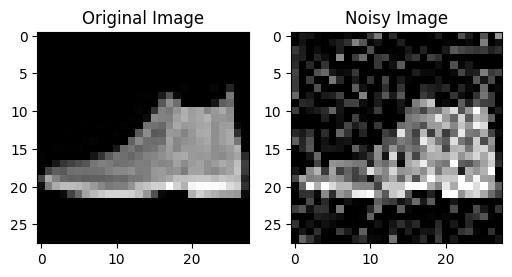

313/313 [==============================] - 1s 3ms/step - loss: 0.8232 - accuracy: 0.7039
Test accuracy on noisy images: 0.7038999795913696
313/313 [==============================] - 1s 2ms/step


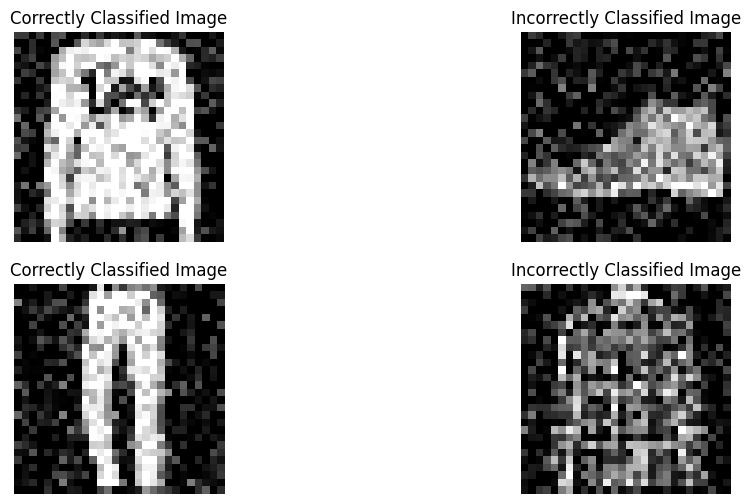

In [2]:
# Proszę wytrenować sieć CNN do dobrego rozpoznawania przedstawicieli klas z danych. Następnie
# proszę poeksperymentować z losowym zaburzeniem obrazu z danej klasy tak, aby skutecznie zmylić
# klasyfikator CNN.


# Importowanie bibliotek
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Załadowanie danych Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizacja danych
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Zakodowanie etykiet kategorialnie
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Definicja modelu CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Ewaluacja modelu
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Generowanie losowego zaburzenia obrazu
def add_noise(image, noise_factor=0.2):
    noise = np.random.normal(loc=0, scale=1, size=image.shape)
    noisy_image = image + noise_factor * noise
    noisy_image = np.clip(noisy_image, 0., 1.)
    return noisy_image

# Przykład użycia funkcji do dodania szumu do obrazu
index = 0  # zmień index, aby uzyskać inny obraz
noisy_image = add_noise(x_test[index])

# Wyświetlenie obrazów oryginalnego i zaburzonego
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(x_test[index]), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(noisy_image), cmap='gray')
plt.title('Noisy Image')

plt.show()

# Funkcja do generowania zaburzonych obrazów na zbiorze testowym
def generate_noisy_images(x_test, noise_factor=0.2):
    noisy_images = []
    for image in x_test:
        noisy_image = add_noise(image, noise_factor)
        noisy_images.append(noisy_image)
    return np.array(noisy_images)

# Generowanie zaburzonych obrazów na zbiorze testowym
noisy_x_test = generate_noisy_images(x_test)

# Ewaluacja modelu na zaburzonych obrazach
noisy_test_loss, noisy_test_acc = model.evaluate(noisy_x_test, y_test)
print(f'Test accuracy on noisy images: {noisy_test_acc}')

# Przykłady poprawnie sklasyfikowanych obrazów
correctly_classified_indices = np.where(np.argmax(model.predict(noisy_x_test), axis=1) == np.argmax(y_test, axis=1))[0]

# Przykłady błędnie sklasyfikowanych obrazów
incorrectly_classified_indices = np.where(np.argmax(model.predict(noisy_x_test), axis=1) != np.argmax(y_test, axis=1))[0]

# Wyświetlenie przykładowych poprawnie i błędnie sklasyfikowanych obrazów
plt.figure(figsize=(12, 6))

# Poprawnie sklasyfikowane
plt.subplot(2, 2, 1)
plt.imshow(np.squeeze(noisy_x_test[correctly_classified_indices[0]]), cmap='gray')
plt.title('Correctly Classified Image')
plt.axis('off')

# Błędnie sklasyfikowane
plt.subplot(2, 2, 2)
plt.imshow(np.squeeze(noisy_x_test[incorrectly_classified_indices[0]]), cmap='gray')
plt.title('Incorrectly Classified Image')
plt.axis('off')

# Poprawnie sklasyfikowane
plt.subplot(2, 2, 3)
plt.imshow(np.squeeze(noisy_x_test[correctly_classified_indices[1]]), cmap='gray')
plt.title('Correctly Classified Image')
plt.axis('off')

# Błędnie sklasyfikowane
plt.subplot(2, 2, 4)
plt.imshow(np.squeeze(noisy_x_test[incorrectly_classified_indices[1]]), cmap='gray')
plt.title('Incorrectly Classified Image')
plt.axis('off')

plt.show()

